In [96]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Dependencies
import tweepy
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [58]:
# Set target users

target_users = ["bbcworld", "cbsnews", "cnn", "foxnews", "nytimes"]

dictionary = {"Target User" : [],
       "Compound Score" : [],
       "Positive Score" : [],
       "Negative Score" : [],
       "Neutral Score" : [],
        "Date and Time" : []}

# Loop through target users
for user in target_users:
    
#     #Loop through 5 pages of tweets
     for x in range(1, 6):

#         # Get all tweets from home feed
         public_tweets = api.user_timeline(user, page=x)
        
#         #Loop through all tweets from user's home page
         for tweet in public_tweets:
            
            dictionary["Target User"].append(user)
            
             #Pull out tweet text and run vader analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]
            
             #Add to list
            dictionary["Compound Score"].append(compound)
            dictionary["Positive Score"].append(positive)
            dictionary["Negative Score"].append(negative)
            dictionary["Neutral Score"].append(neutral)
            
             #Pull out data/time information
            raw_time = tweet["created_at"]
            tweet_times = []
            tweet_times.append(raw_time)
            
            #Convert timestamps
            for raw_time in tweet_times:
                converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
                dictionary["Date and Time"].append(converted_time)
            
final_data = pd.DataFrame(dictionary)

final_data.head()

,Target User,Compound Score,Positive Score,Negative Score,Neutral Score,Date and Time
0,bbcworld,-0.5423,0.0,0.368,0.632,2018-10-01 21:48:40+00:00
1,bbcworld,-0.3182,0.0,0.315,0.685,2018-10-01 21:37:12+00:00
2,bbcworld,0.0000,0.0,0.000,1.000,2018-10-01 21:33:25+00:00
3,bbcworld,0.0000,0.0,0.000,1.000,2018-10-01 19:45:07+00:00
4,bbcworld,-0.6908,0.0,0.299,0.701,2018-10-01 19:31:39+00:00


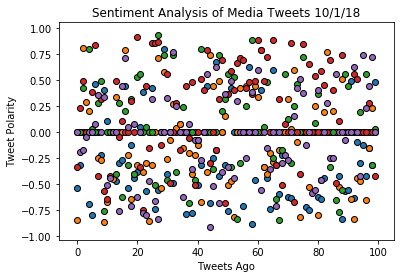

In [89]:
bbc_values = final_data.loc[final_data['Target User'] == "bbcworld"]
cbs_values = final_data.loc[final_data['Target User'] == "cbsnews"]
cnn_values = final_data.loc[final_data['Target User'] == "cnn"]
fox_values = final_data.loc[final_data['Target User'] == "foxnews"]
nyt_values = final_data.loc[final_data['Target User'] == "nytimes"]

plt.scatter(range(len(bbc_values)), (bbc_values["Compound Score"]), edgecolors="black")
plt.scatter(range(len(cbs_values)), (cbs_values["Compound Score"]), edgecolors="black")
plt.scatter(range(len(cnn_values)), (cnn_values["Compound Score"]), edgecolors="black")
plt.scatter(range(len(fox_values)), (fox_values["Compound Score"]), edgecolors="black")
plt.scatter(range(len(nyt_values)), (nyt_values["Compound Score"]), edgecolors="black")
plt.title("Sentiment Analysis of Media Tweets 10/1/18")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()

Text(0,0.5,'Tweet Polarity')

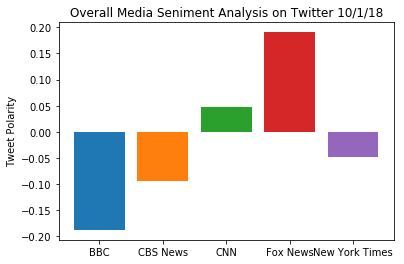

In [112]:
plt.bar("BBC", bbc_values["Compound Score"].mean())
plt.bar("CBS News", cbs_values["Compound Score"].mean())
plt.bar("CNN", cnn_values["Compound Score"].mean())
plt.bar("Fox News", fox_values["Compound Score"].mean())
plt.bar("New York Times", nyt_values["Compound Score"].mean())
plt.title("Overall Media Seniment Analysis on Twitter 10/1/18")
plt.ylabel("Tweet Polarity")